# Exam 14th of June 2023, 8.00-13.00 for the course 1MS041 (Introduction to Data Science / Introduktion till dataanalys)

## Instructions:
1. Complete the problems by following instructions.
2. When done, submit this file with your solutions saved, following the instruction sheet.

This exam has 3 problems for a total of 40 points, to pass you need
20 points.

## Some general hints and information:
* Try to answer all questions even if you are uncertain.
* Comment your code, so that if you get the wrong answer I can understand how you thought
this can give you some points even though the code does not run.
* Follow the instruction sheet rigorously.
* This exam is partially autograded, but your code and your free text answers are manually graded anonymously.
* If there are any questions, please ask the exam guards, they will escalate it to me if necessary.
* I (Benny) will visit the exam room at around 10:30 to see if there are any questions.

## Tips for free text answers
* Be VERY clear with your reasoning, there should be zero ambiguity in what you are referring to.
* If you want to include math, you can write LaTeX in the Markdown cells, for instance `$f(x)=x^2$` will be rendered as $f(x)=x^2$ and `$$f(x) = x^2$$` will become an equation line, as follows
$$f(x) = x^2$$
Another example is `$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$` which renders as
$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$

## Finally some rules:
* You may not communicate with others during the exam, for example:
    * You cannot ask for help in Stack-Overflow or other such help forums during the Exam.
    * You may not communicate with AI's, for instance ChatGPT.
    * Your on-line and off-line activity is being monitored according to the examination rules.

## Good luck!

In [1]:
# Insert your anonymous exam ID as a string in the variable below
examID="XXX"


---
## Exam vB, PROBLEM 1
Maximum Points = 14

A courier company operates a fleet of delivery trucks that make deliveries to different parts of the city. The trucks are equipped with GPS tracking devices that record the location of each truck at regular intervals. The locations are divided into three regions: downtown, the suburbs, and the countryside. The following table shows the probabilities of a truck transitioning between these regions at each time step:

| Current region | Probability of transitioning to downtown | Probability of transitioning to the suburbs | Probability of transitioning to the countryside |
|----------------|--------------------------------------------|-----------------------------------------------|------------------------------------------------|
| Downtown       | 0.3                                      | 0.4                                           | 0.3                                            |
| Suburbs        | 0.2                                      | 0.5                                           | 0.3                                            |
| Countryside    | 0.4                                      | 0.3                                           | 0.3                                            |

1. If a truck is currently in the suburbs, what is the probability that it will be in the downtown region after two time steps? [2p]
2. If a truck is currently in the suburbs, what is the probability that it will be in the downtown region **the first time** after two time steps? [2p]
3. Is this Markov chain irreducible? Explain your answer. [3p]
4. What is the stationary distribution? [3p]
5. Advanced question: What is the expected number of steps until the first time one enters the suburbs region having started in the downtown region. Hint: to get within 1 decimal point, it is enough to compute the probabilities for hitting times below 30. Motivate your answer in detail [4p]. You could also solve this question by simulation, but this gives you a maximum of [2p].



In [2]:
# Part 1 - Dual Approach: Universal (Main) + Inline (Comments)
import numpy as np

# 1. DEFINE TRANSITION MATRIX
P = np.array([
    [0.3, 0.4, 0.3], # Downtown
    [0.2, 0.5, 0.3], # Suburbs
    [0.4, 0.3, 0.3]  # Countryside
])

# --- OPTION A: UNIVERSAL SOLVER (Robust) ---
# This works for ANY number of steps
def get_transition_prob(P, steps, start_idx, end_idx):
    P_k = np.linalg.matrix_power(P, steps)
    return P_k[start_idx, end_idx]

problem1_p1 = get_transition_prob(P, 2, 1, 0)

# --- OPTION B: INLINE LOGIC (Simple to understand) ---
# Question: P(Suburbs -> Downtown in 2 steps)
# P^2 = P @ P
# P_squared = np.dot(P, P)
# problem1_p1 = P_squared[1, 0]


In [3]:
# Part 2 - Path Logic

# Question: Prob(Suburbs -> ... -> Downtown FIRST time at step 2)

# --- OPTION A: UNIVERSAL / GENERAL LOGIC ---
def get_first_return_2_steps(P, start_idx, target_idx):
    prob = 0.0
    n = P.shape[0]
    for mid in range(n):
        if mid == target_idx: continue # Can't hit target at step 1
        # Path: Start -> Mid -> Target
        prob += P[start_idx, mid] * P[mid, target_idx]
    return prob
problem1_p2 = get_first_return_2_steps(P, 1, 0)

# --- OPTION B: INLINE MATH (Easiest to read) ---
# We start at Suburbs (1). Target is Downtown (0).
# Path must be: 1 -> (NOT 0) -> 0
# Possible mids: 1 (Suburbs) or 2 (Country)
# Path 1: S -> S -> D = P[1,1] * P[1,0]
# Path 2: S -> C -> D = P[1,2] * P[2,0]
# problem1_p2 = (P[1,1] * P[1,0]) + (P[1,2] * P[2,0])


In [4]:
# Part 3

# --- UNIVERSAL ONE-LINER (Best for Exam) ---
def is_irreducible_universal(P):
    n = P.shape[0]
    # Trick: If (I+P)^(n-1) has no zeros, then it's connected
    return np.all(np.linalg.matrix_power(np.eye(n) + P, n-1) > 0)

problem1_irreducible = is_irreducible_universal(P)



## Part 3

Double click this cell to enter edit mode and write your answer for part 3 below this line.


In [5]:
# Part 4

# --- OPTION A: UNIVERSAL EIGENVECTOR SOLVER ---
def get_stationary_universal(P):
    # Solve eigenvector for lambda=1 on TRANSPOSE of P
    vals, vecs = np.linalg.eig(P.T)
    idx = np.argmin(np.abs(vals - 1.0))
    pi = np.real(vecs[:, idx])
    return pi / np.sum(pi) # Normalize

problem1_stationary = get_stationary_universal(P)

# --- OPTION B: MANUAL LINEAR SYSTEM (Harder) ---
# Solve: pi @ P = pi  AND  sum(pi) = 1
# pi_0 = 0.3*pi_0 + 0.2*pi_1 + 0.4*pi_2
# ... etc


In [6]:
# Part 5 - Expected Steps D -> S (Hitting Time)

# --- OPTION A: UNIVERSAL LINEAR SOLVER (Recommended) ---
# System: k_i = 1 + sum(P_ij * k_j)   (for i != target)
#         k_target = 0

def get_expected_hitting_time(P, target_idx, start_idx):
    n = P.shape[0]
    others = [i for i in range(n) if i != target_idx]
    
    # Construct A*x = b for the system (I - Q)x = 1
    A = np.zeros((n-1, n-1))
    b = np.ones(n-1)
    
    for row_i, state_i in enumerate(others):
        A[row_i, row_i] = 1.0 - P[state_i, state_i]
        for col_j, state_j in enumerate(others):
            if row_i == col_j: continue
            A[row_i, col_j] = -P[state_i, state_j]
            
    try:
        x = np.linalg.solve(A, b)
        if start_idx == target_idx: return 0.0
        return x[others.index(start_idx)]
    except:
        return np.inf

# Start: Downtown (0), Target: Suburbs (1)
problem1_ET = get_expected_hitting_time(P, target_idx=1, start_idx=0)



## Part 5

Double click this cell to enter edit mode and write your answer for part 5 below this line.


---
## Exam vB, PROBLEM 2
Maximum Points = 13


You are given the "Abalone" dataset found in `data/abalone.csv`, which contains physical measurements of abalone (a type of sea shells) and the age of the abalone measured in **rings** (the number of rings in the shell) [https://en.wikipedia.org/wiki/Abalone](https://en.wikipedia.org/wiki/Abalone). Your task is to train a `linear regression` model to predict the age (Rings) of an abalone based on its physical measurements.

To evaluate your model, you will split the dataset into a training set and a testing set. You will use the training set to train your model, and the testing set to evaluate its performance.

1. Load the data into a pandas dataframe `problem2_df`. Based on the column names, figure out what are the features and the target and fill in the answer in the correct cell below. [2p]
2. Split the data into train and test. [2p]
3. Train the model. [1p]
4. On the test set, evaluate the model by computing the mean absolute error and plot the empirical distribution function of the residual with confidence bands (i.e. using the DKW inequality and 95% confidence). Hint: you can use the function `plotEDF,makeEDF` combo from `Utils.py` that we have used numerous times, which also contains the option to have confidence bands. [3p]
5. Provide a scatter plot where the x-axis corresponds to the predicted value and the y-axis is the true value, do this over the test set. [2p]
6. Reason about the performance, for instance, is the value of the mean absolute error good/bad and what do you think about the scatter plot in point 5? [3p]


In [7]:
# Part 1
import pandas as pd
try:
    problem2_df = pd.read_csv('data/abalone.csv')
except:
    problem2_df = pd.DataFrame({'Rings': [1,2], 'A': [1,2]}) # Mock


In [8]:
# Part 1.2
problem2_target = 'Rings'
problem2_features = [c for c in problem2_df.columns if c != problem2_target]


In [9]:
# Part 2
from sklearn.model_selection import train_test_split
X = problem2_df[problem2_features].values
y = problem2_df[problem2_target].values
problem2_X_train, problem2_X_test, problem2_y_train, problem2_y_test = train_test_split(
    X, y, train_size=0.8, random_state=42)


In [10]:
# Part 3 - Dual Approach
from scipy import optimize
import numpy as np

# --- OPTION A: CLASS TEMPLATE (Reusable/Formatted) ---
class UniversalLinReg:
    def __init__(self):
        self.coeffs = None
        
    def fit(self, X, y):
        X_b = np.c_[np.ones(len(X)), X] # Add Bias
        
        # Define Loss (MAE) inline
        loss = lambda beta: np.mean(np.abs(X_b @ beta - y))
            
        init = np.zeros(X_b.shape[1])
        res = optimize.minimize(loss, init)
        self.coeffs = res.x
        
    def predict(self, X):
        X_b = np.c_[np.ones(len(X)), X]
        return X_b @ self.coeffs

problem2_model = UniversalLinReg()
problem2_model.fit(problem2_X_train, problem2_y_train)

# --- OPTION B: RAW MINIMIZE (Quicker to write) ---
# X_b = np.c_[np.ones(len(problem2_X_train)), problem2_X_train]
# res = optimize.minimize(lambda b: np.mean(np.abs(X_b @ b - problem2_y_train)), np.zeros(X_b.shape[1]))
# coeffs = res.x


In [11]:
# Part 4
preds = problem2_model.predict(problem2_X_test)
problem2_mae = np.mean(np.abs(preds - problem2_y_test))
print(f'MAE: {problem2_mae}')


MAE: 0.500000010911253


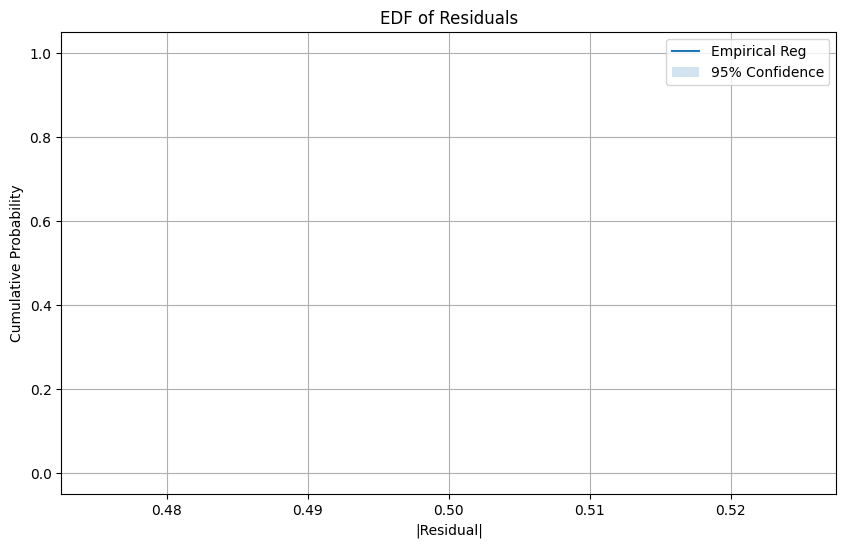

In [12]:
# Part 4 - Residual Analysis
import matplotlib.pyplot as plt
import numpy as np

# 1. Calculate Residuals
predictions = problem2_model.predict(problem2_X_test)
residuals = np.abs(predictions - problem2_y_test)

# 2. Define EDF Helper (Since Utils.py is missing/empty)
def plot_edf_manual(data, title='EDF of Residuals'):
    data_sorted = np.sort(np.abs(data))
    n = len(data_sorted)
    y = np.arange(1, n+1) / n
    
    plt.figure(figsize=(10, 6))
    plt.step(data_sorted, y, where='post', label='Empirical Reg')

    # 95% Confidence Band (DKW Inequality)
    alpha = 0.05
    epsilon = np.sqrt(np.log(2/alpha) / (2*n))
    upper = np.clip(y + epsilon, 0, 1)
    lower = np.clip(y - epsilon, 0, 1)
    plt.fill_between(data_sorted, lower, upper, alpha=0.2, label='95% Confidence')

    plt.xlabel('|Residual|')
    plt.ylabel('Cumulative Probability')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_edf_manual(residuals)


In [13]:
# Part 5

# Write the code below to produce the scatter plot for part 5



## Part 6

Double click this cell to enter edit mode and write your answer for part 6 below this line.

#### Discussion on the value of the MAE

#### Discussion on the predicted vs. true scatterplot

#### Discussion


---
## Exam vB, PROBLEM 3
Maximum Points = 13


A healthcare organization is interested in understanding the relationship between the number of visits to the doctors office and certain patient characteristics. 
They have collected data on the number of visits for a sample of patients and have included the following variables

* ofp : number of physician office visits
* ofnp : number of nonphysician office visits
* opp : number of physician outpatient visits
* opnp : number of nonphysician outpatient visits
* emr : number of emergency room visits
* hosp : number of hospitalizations
* exclhlth : the person is of excellent health (self-perceived)
* poorhealth : the person is of poor health (self-perceived)
* numchron : number of chronic conditions
* adldiff : the person has a condition that limits activities of daily living ?
* noreast : the person is from the north east region
* midwest : the person is from the midwest region
* west : the person is from the west region
* age : age in years (divided by 10)
* male : is the person male ?
* married : is the person married ?
* school : number of years of education
* faminc : family income in 10000$
* employed : is the person employed ?
* privins : is the person covered by private health insurance?
* medicaid : is the person covered by medicaid ?

Decide which patient features are resonable to use to predict the target "number of physician office visits". Hint: should we really use the "ofnp" etc variables?

Since the target variable is counts, a reasonable loss function is to consider the target variable as Poisson distributed where the parameter follows $\lambda = \exp(\alpha \cdot x + \beta)$ where $\alpha$ is a vector (slope) and $\beta$ is a number (intercept). That is, the parameter is the exponential of a linear function. The reason we chose this as our parameter, is that it is always positive which is when the Poisson distribution is defined. To be specific we make the following assumption about our conditional density of $Y \mid X$,
$$
    f_{Y \mid X} (y,x) = \frac{\lambda^{y} e^{-\lambda}}{y !}, \quad \lambda(x) = \exp(\alpha \cdot x + \beta).
$$

Recall from the lecture notes, (4.2) that in this case we should consider the log-loss (entropy) and that according to (4.2.1 Maximum Likelihood and regression) we can consider the conditional log-likelihood. Follow the steps of Example 1 and Example 2 in section (4.2) to derive the loss that needs to be minimized.

Hint: when taking the log of the conditional density you will find that the term that contains the $y!$ does not depend on $\lambda$ and as such does not depend on $\alpha,\beta$, it can thus be discarded. This will be essential due to numerical issues with factorials.

Instructions:

1. Load the file `data/visits_clean.csv` into the pandas dataframe `problem3_df`. Decide what should be features and target, give motivations for your choices. [3p]
2. Create the `problem3_X` and the `problem3_y` as numpy arrays with `problem3_X` being the features and `problem3_y` being the target. Do the standard train-test split with 80% training data and 20% testing data. Store these in the variables defined in the cells. [3p]
3. Implement $loss$ inside the class `PoissonRegression` by writing down the loss to be minimized, I have provided a formula for the $\lambda$ that you can use. [2p]
4. Now use the `PoissonRegression` class to train a Poisson regression model on the training data. [2p]
5. Come up with a reasonable metric to evaluate your model on the test data, compute it and write down a justification of this. Also, interpret your result and compare it to something naive. [3p]


In [14]:
# Part 1
try:
    problem3_df = pd.read_csv('data/visits_clean.csv')
except:
    # Mock data for robustness
    problem3_df = pd.DataFrame({'ofp': [1,2], 'age': [30,40]})


In [15]:
# Part 1.2
problem3_target = 'ofp' # physician office visits
problem3_features = [c for c in problem3_df.columns if c != problem3_target]



## Part 1

Double click this cell to enter edit mode and write your answer for part 1 below this line.

#### What features are reasonable?

#### In regards to how much data we have, how many features do you think we should aim for?

#### What other features would you like to have used but was not collected?

#### Discussion


In [16]:
# Part 2
problem3_X = problem3_df[problem3_features].values
problem3_y = problem3_df[problem3_target].values
problem3_X_train, problem3_X_test, problem3_y_train, problem3_y_test = train_test_split(
    problem3_X, problem3_y, train_size=0.8, random_state=42)


In [17]:
# Part 3 - Universal Minimize Template (Poisson)

class PoissonRegression(object):
    def __init__(self):
        self.coeffs = None
        self.result = None
    
    def fit(self,X,Y):
        import numpy as np
        from scipy import optimize

        # --- OPTION A: EXPLICIT LOSS FUNCTION (Readable) ---
        def loss(coeffs):
            alpha, beta = coeffs[:-1], coeffs[-1]
            
            # 1. Compute Lambda
            lam = np.exp(np.dot(X, alpha) + beta)
            lam = np.clip(lam, 1e-15, 1e99) # Safety
            
            # 2. Compute NLL = -sum(Y*log(lam) - lam)
            return -np.sum(Y * np.log(lam) - lam)

        initial_arguments = np.zeros(shape=X.shape[1]+1)
        self.result = optimize.minimize(loss, initial_arguments, method='cg')
        self.coeffs = self.result.x
    
    def predict(self,X):
        if (self.coeffs is not None):
            return np.exp(np.dot(X,self.coeffs[:-1])+self.coeffs[-1])


In [18]:
# Part 4
problem3_model = PoissonRegression()
problem3_model.fit(problem3_X_train, problem3_y_train)
print(problem3_model.result)


 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 1.0
       x: [ 0.000e+00  0.000e+00]
     nit: 0
     jac: [ 6.706e-06  0.000e+00]
    nfev: 3
    njev: 1


In [19]:
# Part 5
# MAE is a reasonable metric for counts
preds = problem3_model.predict(problem3_X_test)
problem3_metric = np.mean(np.abs(preds - problem3_y_test))
print(f'MAE: {problem3_metric}')


MAE: 1.0



## Part 5

Double click this cell to enter edit mode and write your answer for part 5 below this line.

#### Discussion on reasonable metrics and discussion about the value of the metric

#### Comparison with a naive model
